Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1027]:
from random import choices, choice, random, randint, sample
from copy import copy

import lab9_lib

In [1028]:
GENOME_LENGTH = 50

In [1029]:
fitness = lab9_lib.make_problem(5)

In [1030]:
POPULATION_SIZE = 20
OFFSPRING_SIZE = POPULATION_SIZE
MUTATION_PROBABILITY = .2
TOURNAMENT_SIZE = 3

In [1031]:
def tournament_selection(population):
    return max(
        [choice(population) for _ in range(TOURNAMENT_SIZE)], key=lambda i: fitness(i)
    )


def one_cut_xover(ind1, ind2):
    cut_point = randint(0, GENOME_LENGTH - 1)
    offspring = ind1[:cut_point] + ind2[cut_point:]
    return offspring


def flip_random_bit(ind):
    offspring = copy(ind)
    pos = randint(0, GENOME_LENGTH - 1)
    offspring[pos] = int(not offspring[pos])
    return offspring


def swap_two_bits(ind):
    offspring = copy(ind)
    pos1, pos2 = tuple(choices(range(0, GENOME_LENGTH), k=2))
    offspring[pos1] = ind[pos2]
    offspring[pos2] = ind[pos1]
    return offspring


def scramble(ind):
    offspring = copy(ind)
    pos1 = randint(0, GENOME_LENGTH - 1)
    pos2 = randint(pos1, GENOME_LENGTH - 1)
    to_scramble = offspring[pos1:pos2]
    permutation = sample(to_scramble, len(to_scramble))
    offspring[pos1:pos2] = permutation
    return offspring


def inversion(ind):
    offspring = copy(ind)
    pos1 = randint(0, GENOME_LENGTH - 1)
    pos2 = randint(pos1, GENOME_LENGTH - 1)
    offspring[pos1:pos2] = list(reversed(ind[pos1:pos2]))
    return offspring

0.186912 [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0.186912 [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0.186912 [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0.186912 [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0.30912 [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
0.30912 [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
0.30912 [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 

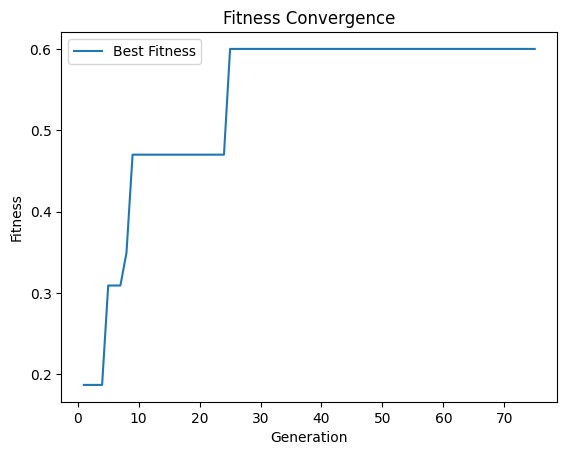

[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
11916


In [1032]:
population = [choices([0, 1], k=GENOME_LENGTH)] * POPULATION_SIZE

import matplotlib.pyplot as plt


def evolution(
    population, parent_selection, crossover, mutation, generations, max_no_improvement
):
    best_fitness = float("-inf")
    consecutive_no_improvement = 0

    mutation_probability = MUTATION_PROBABILITY

    fitness_history = []

    for generation in range(1, generations + 1):
        offspring = list()
        for _ in range(OFFSPRING_SIZE):
            if random() < mutation_probability:
                p = parent_selection(population)
                o = mutation(p)
            else:
                p1 = parent_selection(population)
                p2 = parent_selection(population)
                o = crossover(p1, p2)
            offspring.append(o)

        population.extend(offspring)
        population.sort(key=lambda i: fitness(i), reverse=True)
        population = population[:POPULATION_SIZE]

        current_fitness = fitness(population[0])
        print(current_fitness, population[0])

        fitness_history.append(current_fitness)

        if current_fitness > best_fitness:
            best_fitness = current_fitness
            consecutive_no_improvement = 0
        else:
            consecutive_no_improvement += 1
            mutation_probability *= 0.9

        if consecutive_no_improvement >= max_no_improvement:
            print(f"Converged at generation {generation}")
            break

    # Plotting fitness history
    plt.plot(range(1, generation + 1), fitness_history, label="Best Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Convergence")
    plt.legend()
    plt.show()

    return population


print(
    evolution(
        population,
        tournament_selection,
        one_cut_xover,
        scramble,
        500,
        max_no_improvement=50,
    )[0]
)
print(fitness.calls)